Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from metrics import print_evaluation_metrics
import pickle

Load dataset

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column, 'New_cases_yesterday']]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
dates = df.index.values

Create model

In [3]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [13]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [14]:
print(model_lists["univariate"])

['FFT', 'ConstantNaive', 'SeasonalNaive', 'DatepartRegression', 'ARCH', 'LastValueNaive', 'KalmanStateSpace', 'NeuralProphet', 'ARDL', 'MLEnsemble', 'PreprocessingRegression', 'Theta', 'MetricMotif', 'SeasonalityMotif', 'UnivariateMotif', 'ARIMA', 'UnobservedComponents', 'ETS', 'GLM', 'UnivariateRegression', 'FBProphet', 'GLS', 'AverageValueNaive']


Train test split, fit and prediction

In [4]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

In [5]:
model.fit(train)
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1 with model KalmanStateSpace in generation 0 of 5
Model Number: 2 with model SeasonalityMotif in generation 0 of 5
Model Number: 3 with model ETS in generation 0 of 5
Model Number: 4 with model AverageValueNaive in generation 0 of 5
Model Number: 5 with model GLS in generation 0 of 5
Model Number: 6 with model UnobservedComponents in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Model Number: 7 with model FBProphet in generation 0 of 5


16:02:15 - cmdstanpy - INFO - Chain [1] start processing
16:02:15 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 8 with model LastValueNaive in generation 0 of 5
Model Number: 9 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46980D-01    |proj g|=  1.85996D-01

At iterate    1    f=  3.45072D-01    |proj g|=  1.24166D-01

At iterate    2    f=  3.43968D-01    |proj g|=  8.03112D-02

At iterate    3    f=  3.37399D-01    |proj g|=  1.62747D-01

At iterate    4    f=  3.23693D-01    |proj g|=  4.15286D-01

At iterate    5    f=  3.09452D-01    |proj g|=  5.05114D-01

At iterate    6    f=  2.92056D-01    |proj g|=  4.00047D-01

At iterate    7    f=  2.62971D-01    |proj g|=  7.93065D-02

At iterate    8    f=  2.58723D-01    |proj g|=  3.39710D-01

At iterate    9    f=  2.56274D-01    |proj g|=  2.13291D-01

At iterate   10    f=  2.54050D-01    |proj g|=  2.15804D-02

At iterate   11    f=  2.53899D-0

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 10 with model DatepartRegression in generation 0 of 5
Model Number: 11 with model FFT in generation 0 of 5
Model Number: 12 with model ARDL in generation 0 of 5
Model Number: 13 with model Theta in generation 0 of 5
Model Number: 14 with model UnivariateRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 15 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 16 with model MetricMotif in generation 0 of 5
Model Number: 17 with model ConstantNaive in generation 0 of 5
Model Number: 18 with model UnivariateMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 19 with model SeasonalityMotif in generation 1 of 5
Model Number: 20 with model SeasonalityMotif in generation 1 of 5
Model Number: 21 with model SeasonalityMotif in generation 1 of 5
Model Number: 22 with model ConstantNaive in generation 1 of 5
Model Number: 23 with model ConstantNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 23 in generation 1: ConstantNaive
Model Number: 24 with model ConstantNaive in generation 1 of 5
Model Number: 25 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 25 in generation 1: GLM
Model Number: 26 with model GLM in generat

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/fam

Model Number: 28 with model KalmanStateSpace in generation 1 of 5
Model Number: 29 with model KalmanStateSpace in generation 1 of 5
Model Number: 30 with model KalmanStateSpace in generation 1 of 5
Model Number: 31 with model AverageValueNaive in generation 1 of 5
Model Number: 32 with model AverageValueNaive in generation 1 of 5
Model Number: 33 with model AverageValueNaive in generation 1 of 5
Model Number: 34 with model GLS in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 34 in generation 1: GLS
Model Number: 35 with model GLS in generation 1 of 5
Model Number: 36 with model GLS in generation 1 of 5
Model Number: 37 with model ETS in generation 1 of 5
Model Number: 38 with model ETS in generation 1 of 5
Model Number: 39 with model ETS in generation 1 of 5
Model Number: 40 with model ARDL in generation 1 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 40 in generation 1: ARDL
Mod

 This problem is unconstrained.



At iterate    5    f= -4.43916D-01    |proj g|=  1.53267D+00

At iterate    6    f= -4.74370D-01    |proj g|=  2.31036D-01

At iterate    7    f= -4.86492D-01    |proj g|=  5.28260D-01

At iterate    8    f= -5.05134D-01    |proj g|=  6.18489D-01

At iterate    9    f= -5.40371D-01    |proj g|=  7.95582D-01

At iterate   10    f= -5.69951D-01    |proj g|=  1.51169D-01

At iterate   11    f= -5.75647D-01    |proj g|=  2.29493D-01

At iterate   12    f= -5.82184D-01    |proj g|=  2.77388D-01

At iterate   13    f= -5.91757D-01    |proj g|=  2.97123D-01

At iterate   14    f= -6.03298D-01    |proj g|=  7.37359D-02

At iterate   15    f= -6.08859D-01    |proj g|=  5.94180D-02

At iterate   16    f= -6.12217D-01    |proj g|=  8.06112D-01

At iterate   17    f= -6.16403D-01    |proj g|=  3.53902D-01

At iterate   18    f= -6.20389D-01    |proj g|=  1.19240D-01

At iterate   19    f= -6.29248D-01    |proj g|=  4.76906D-01

At iterate   20    f= -6.32646D-01    |proj g|=  6.02945D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  5.32806D-02    |proj g|=  1.82272D+00

At iterate    2    f= -2.84134D-01    |proj g|=  4.95024D-01

At iterate    3    f= -3.14364D-01    |proj g|=  1.31434D+00

At iterate    4    f= -4.05863D-01    |proj g|=  1.22385D+00

At iterate    5    f= -4.75438D-01    |proj g|=  5.15690D-01

At iterate    6    f= -4.92233D-01    |proj g|=  1.69201D-01

At iterate    7    f= -5.19538D-01    |proj g|=  1.84542D-01

At iterate    8    f= -5.25316D-01    |proj g|=  2.02253D-01

At iterate    9    f= -5.33094D-01    |proj g|=  1.12645D-01

At iterate   10    f= -5.47939D-01    |proj g|=  2.81815D-01

At iterate   11    f= -5.60061D-01    |proj g|=  3.56301D-01

At iterate   12    f= -5.62381D-01    |proj g|=  1.41480D-01

At iterate   13    f= -5.72341D-01    |proj g|=  3.11593D-01

At iterate   14    f= -5.73403D-01    |proj g|=  1.48817D-01

At iterate   15    f= -5.77335D-01    |proj g|=  9.38435D-02

At iterate   16    f= -5.78033D-01    |proj g|=  7.32633D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 80 in generation 2: GLM
Model Number: 81 with model GLM in generation 2 of 5
Model Number: 82 with model SeasonalityMotif in generation 2 of 5
Model Number: 83 with model SeasonalityMotif in generation 2 of 5
Model Number: 84 with model SeasonalityMotif in generation 2 of 5
Model Number: 85 with model KalmanStateSpace in generation 2 of 5
Model Number: 86 with model KalmanStateSpace in generation 2 of 5
Model Number: 87 with model KalmanStateSpace in generation 2 of 5
Model Number: 88 with model UnobservedComponents in generation 2 of 5
Model Number: 89 with model UnobservedComponents in generation 2 of 5
Model Number: 90 with model UnobservedComponents in generation 2 of 5
Model Number: 91 with model AverageValueNaive in generation 2 of 5
Model Number: 92 with model AverageValueNaive in generation 2 of 5
Model Number: 93 with model AverageValueNaive in generation 2 of 5
Model Number: 94 with m

/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 98 with model KalmanStateSpace in generation 2 of 5
Model Number: 99 with model KalmanStateSpace in generation 2 of 5
Model Number: 100 with model ETS in generation 2 of 5
Model Number: 101 with model ETS in generation 2 of 5
Model Number: 102 with model ETS in generation 2 of 5
Model Number: 103 with model GLS in generation 2 of 5
Model Number: 104 with model GLS in generation 2 of 5
Model Number: 105 with model FFT in generation 2 of 5
Model Number: 106 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 107 with model FFT in generation 2 of 5
Model Number: 108 with model GLS in generation 2 of 5
Model Number: 109 with model ETS in generation 2 of 5
Model Number: 110 with model ETS in generation 2 of 5
Model Number: 111 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 111 in generation 2: ARDL
Model Number: 112 with model ARDL in generation 2 of 5
Model Number: 113 with model ConstantNaive in generation 2 of 5
Model Number: 114 with model ConstantNaive in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'MinMaxScaler'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {}}}. fail_on_forecast_nan=True") in model 114 in generation

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 127 with model UnivariateMotif in generation 2 of 5
Model Number: 128 with model UnivariateMotif in generation 2 of 5
Model Number: 129 with model MetricMotif in generation 2 of 5
Model Number: 130 with model MetricMotif in generation 2 of 5
Model Number: 131 with model ETS in generation 2 of 5
Model Number: 132 with model ETS in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'time', 'transformations': {'0': 'AlignLastValue', '1': 'Slice', '2': 'AnomalyRemoval'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 100}, '2': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'quadratic', 'transformations': {'0': 'StandardScaler', '1': 'RollingMeanTransformer'}, 'transformation_params': {'0': {}, '1': {'fixed': False, 'window': 7}}

2024-03-28 16:04:40.363611: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-28 16:04:40.484812: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 16:04:40.484857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 16:04:40.502138: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 16:04:40.538609: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
36/36 [==============================] - 3s 2ms/step - loss: 218964.1719
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 218964.2031
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1719
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1719
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1719
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1719
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1719
Epoch 8/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1875
Epoch 9/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1719
Epoch 10/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1562
Epoch 11/50
36/36 [==============================] - 0s 3ms/step - loss: 218964.1562
Epoch 12/50
36/36 [==============================] - 0s 2ms/step - loss: 2

 This problem is unconstrained.
 This problem is unconstrained.


New Generation: 3 of 5
Model Number: 155 with model GLS in generation 3 of 5
Model Number: 156 with model SeasonalityMotif in generation 3 of 5
Model Number: 157 with model MetricMotif in generation 3 of 5
Model Number: 158 with model GLS in generation 3 of 5
Model Number: 159 with model SeasonalityMotif in generation 3 of 5
Model Number: 160 with model Theta in generation 3 of 5
Model Number: 161 with model SeasonalityMotif in generation 3 of 5
Model Number: 162 with model ETS in generation 3 of 5
Model Number: 163 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 164 with model MetricMotif in generation 3 of 5
Model Number: 165 with model ConstantNaive in generation 3 of 5
Model Number: 166 with model ETS in generation 3 of 5
Model Number: 167 with model SeasonalityMotif in generation 3 of 5
Model Number: 168 with model ETS in generation 3 of 5
Model Number: 169 with model Theta in generation 3 of 5
Model Number: 170 with model ETS in generation 3 of 5
Model Number: 171 with model UnivariateMotif in generation 3 of 5
Model Number: 172 with model FFT in generation 3 of 5
Model Number: 173 with model AverageValueNaive in generation 3 of 5
Model Number: 174 with model FBProphet in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 174 in generation 3: FBProphet
Model Number: 175 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 175 in generation 3: UnobservedComponents

 This problem is unconstrained.



At iterate   39    f=  9.17280D+00    |proj g|=  1.32983D-02

At iterate   40    f=  9.17250D+00    |proj g|=  4.10432D-03

At iterate   41    f=  9.17249D+00    |proj g|=  3.71288D-04

At iterate   42    f=  9.17248D+00    |proj g|=  2.34071D-05

At iterate   43    f=  9.17244D+00    |proj g|=  8.02010D-04

At iterate   44    f=  9.17152D+00    |proj g|=  1.44920D-02

At iterate   45    f=  9.17149D+00    |proj g|=  1.27473D-02

At iterate   46    f=  9.17141D+00    |proj g|=  1.16432D-02

At iterate   47    f=  9.17104D+00    |proj g|=  4.31333D-03

At iterate   48    f=  9.17078D+00    |proj g|=  4.92436D-03

At iterate   49    f=  9.17073D+00    |proj g|=  3.16652D-03

At iterate   50    f=  9.17072D+00    |proj g|=  3.06901D-04

At iterate   51    f=  9.17072D+00    |proj g|=  2.03681D-04

At iterate   52    f=  9.17072D+00    |proj g|=  1.49223D-04

At iterate   53    f=  9.17072D+00    |proj g|=  1.04627D-05

At iterate   54    f=  9.17072D+00    |proj g|=  3.14344D-06

       

 This problem is unconstrained.


Model Number: 183 with model KalmanStateSpace in generation 3 of 5
Model Number: 184 with model ETS in generation 3 of 5
Model Number: 185 with model GLS in generation 3 of 5
Model Number: 186 with model DatepartRegression in generation 3 of 5
Model Number: 187 with model UnivariateMotif in generation 3 of 5
Model Number: 188 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25303D+00    |proj g|=  1.54634D-01


 This problem is unconstrained.



At iterate    1    f= -1.25306D+00    |proj g|=  1.08299D-02

At iterate    2    f= -1.25306D+00    |proj g|=  2.59832D-03

At iterate    3    f= -1.25306D+00    |proj g|=  6.82566D-03

At iterate    4    f= -1.25306D+00    |proj g|=  1.32737D-02

At iterate    5    f= -1.25306D+00    |proj g|=  2.25406D-02

At iterate    6    f= -1.25306D+00    |proj g|=  2.15704D-02

At iterate    7    f= -1.25307D+00    |proj g|=  3.34374D-02

At iterate    8    f= -1.25307D+00    |proj g|=  2.64337D-02

At iterate    9    f= -1.25308D+00    |proj g|=  7.66419D-03

At iterate   10    f= -1.25308D+00    |proj g|=  5.67710D-03

At iterate   11    f= -1.25308D+00    |proj g|=  7.89580D-03

At iterate   12    f= -1.25308D+00    |proj g|=  8.11777D-03

At iterate   13    f= -1.25308D+00    |proj g|=  7.54431D-03

At iterate   14    f= -1.25309D+00    |proj g|=  3.88567D-02

At iterate   15    f= -1.25309D+00    |proj g|=  9.27587D-03

At iterate   16    f= -1.25309D+00    |proj g|=  4.47532D-03

At iter

 This problem is unconstrained.



At iterate    4    f= -1.54911D+00    |proj g|=  1.38775D-02

At iterate    5    f= -1.54911D+00    |proj g|=  2.38319D-02

At iterate    6    f= -1.54912D+00    |proj g|=  4.96802D-02

At iterate    7    f= -1.54913D+00    |proj g|=  3.85563D-02

At iterate    8    f= -1.54914D+00    |proj g|=  9.77431D-03

At iterate    9    f= -1.54914D+00    |proj g|=  5.33483D-03

At iterate   10    f= -1.54914D+00    |proj g|=  1.06821D-02

At iterate   11    f= -1.54914D+00    |proj g|=  1.48832D-02

At iterate   12    f= -1.54914D+00    |proj g|=  1.81165D-02

At iterate   13    f= -1.54915D+00    |proj g|=  3.29084D-02

At iterate   14    f= -1.54916D+00    |proj g|=  1.87249D-02

At iterate   15    f= -1.54917D+00    |proj g|=  1.10106D-02

At iterate   16    f= -1.54918D+00    |proj g|=  1.22670D-02

At iterate   17    f= -1.54918D+00    |proj g|=  1.54580D-02

At iterate   18    f= -1.54918D+00    |proj g|=  8.76099D-03

At iterate   19    f= -1.54918D+00    |proj g|=  2.49251D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 221 with model SeasonalityMotif in generation 3 of 5
Model Number: 222 with model LastValueNaive in generation 3 of 5
Model Number: 223 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29705D-01    |proj g|=  7.96906D+00

At iterate    1    f= -1.29681D-03    |proj g|=  6.47316D-01

At iterate    2    f= -8.48198D-03    |proj g|=  5.34211D-01

At iterate    3    f= -3.61220D-02    |proj g|=  1.78867D+00

At iterate    4    f= -5.94044D-02    |proj g|=  6.38790D-01

At iterate    5    f= -1.00001D-01    |proj g|=  5.43550D-01

At iterate    6    f= -2.95462D-01    |proj g|=  7.61656D-01

At iterate    7    f= -3.99654D-01    |proj g|=  1.34616D+00

At iterate    8    f= -4.26295D-01    |proj g|=  9.02593D-01

At iterate    9    f= -4.61907D-01    |proj g|=  4.14759D-01

At iterate   10    f= -4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73704D-01    |proj g|=  7.24635D+00

At iterate    1    f=  3.25821D-01    |proj g|=  1.43202D+00

At iterate    2    f=  1.07062D-01    |proj g|=  1.14589D+00

At iterate    3    f=  8.50629D-02    |proj g|=  5.25043D-01

At iterate    4    f=  1.44728D-02    |proj g|=  4.78170D-01

At iterate    5    f= -1.35125D-01    |proj g|=  1.24901D+00

At iterate    6    f= -2.38756D-01    |proj g|=  1.02181D+00

At iterate    7    f= -2.86417D-01    |proj g|=  1.94387D-01

At iterate    8    f= -3.19992D-01    |proj g|=  7.19002D-01

At iterate    9    f= -3.36736D-01    |proj g|=  2.67931D-01

At iterate   10    f= -3.49375D-01    |proj g|=  1.40537D-01

At iterate   11    f= -3.56962D-01    |proj g|=  7.69827D-02

At iterate   12    f= -3.62126D-01    |proj g|=  5.07108D-02

At iterate   13    f= -3.6

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 224 with model LastValueNaive in generation 3 of 5
Model Number: 225 with model GLS in generation 3 of 5
Model Number: 226 with model UnivariateMotif in generation 3 of 5
Model Number: 227 with model UnobservedComponents in generation 3 of 5
Model Number: 228 with model AverageValueNaive in generation 3 of 5
Model Number: 229 with model LastValueNaive in generation 3 of 5
Model Number: 230 with model ETS in generation 3 of 5
Model Number: 231 with model ConstantNaive in generation 3 of 5
Model Number: 232 with model GLM in generation 3 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 232 in generation 3: GLM
Model Number: 233 with model DatepartRegression in generation 3 of 5
Model Number: 234 with model KalmanStateSpace in generation 3 of 5
Model Number: 235 with model FFT in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
 This problem is unconstrained.


Model Number: 236 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24741D+00    |proj g|=  2.89738D-01

At iterate    1    f=  1.21513D+00    |proj g|=  1.29946D-01

At iterate    2    f=  1.20475D+00    |proj g|=  1.67834D-01

At iterate    3    f=  1.20059D+00    |proj g|=  2.53448D-02

At iterate    4    f=  1.20008D+00    |proj g|=  1.08297D-02

At iterate    5    f=  1.19995D+00    |proj g|=  1.32797D-03

At iterate    6    f=  1.19995D+00    |proj g|=  7.93623D-05

At iterate    7    f=  1.19995D+00    |proj g|=  4.27340D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm

 This problem is unconstrained.


Model Number: 238 with model AverageValueNaive in generation 3 of 5
Model Number: 239 with model KalmanStateSpace in generation 3 of 5
Model Number: 240 with model MetricMotif in generation 3 of 5
Model Number: 241 with model LastValueNaive in generation 3 of 5
Model Number: 242 with model MetricMotif in generation 3 of 5
Model Number: 243 with model MetricMotif in generation 3 of 5
Model Number: 244 with model KalmanStateSpace in generation 3 of 5
Model Number: 245 with model UnivariateMotif in generation 3 of 5
Model Number: 246 with model SeasonalityMotif in generation 3 of 5
Model Number: 247 with model KalmanStateSpace in generation 3 of 5
Model Number: 248 with model ETS in generation 3 of 5
Model Number: 249 with model UnivariateRegression in generation 3 of 5
Model Number: 250 with model SeasonalityMotif in generation 3 of 5
Model Number: 251 with model FFT in generation 3 of 5
Model Number: 252 with model DatepartRegression in generation 3 of 5
Epoch 1/50
36/36 [==============

 This problem is unconstrained.



At iterate    1    f= -1.76547D+00    |proj g|=  2.76604D-01

At iterate    2    f= -1.76571D+00    |proj g|=  2.80691D-01

At iterate    3    f= -1.76632D+00    |proj g|=  6.40282D-01

At iterate    4    f= -1.76856D+00    |proj g|=  1.90152D+00

At iterate    5    f= -1.77348D+00    |proj g|=  3.65961D+00

At iterate    6    f= -1.78600D+00    |proj g|=  6.43271D+00

At iterate    7    f= -1.81070D+00    |proj g|=  8.63683D+00

At iterate    8    f= -1.84651D+00    |proj g|=  6.50142D+00

At iterate    9    f= -1.86476D+00    |proj g|=  2.24339D+00

At iterate   10    f= -1.86773D+00    |proj g|=  4.45215D-01

At iterate   11    f= -1.86811D+00    |proj g|=  2.72837D-01

At iterate   12    f= -1.86837D+00    |proj g|=  5.03915D-01

At iterate   13    f= -1.86910D+00    |proj g|=  1.11295D+00

At iterate   14    f= -1.87073D+00    |proj g|=  1.92774D+00

At iterate   15    f= -1.87460D+00    |proj g|=  3.00167D+00

At iterate   16    f= -1.88189D+00    |proj g|=  3.93256D+00

At iter

 This problem is unconstrained.



At iterate    1    f= -2.12102D+00    |proj g|=  4.45890D-01

At iterate    2    f= -2.13860D+00    |proj g|=  1.87083D+00

At iterate    3    f= -2.17776D+00    |proj g|=  1.48450D+01

At iterate    4    f= -2.19979D+00    |proj g|=  7.39934D-01

At iterate    5    f= -2.20191D+00    |proj g|=  2.94041D-01

At iterate    6    f= -2.20252D+00    |proj g|=  1.34031D-01

At iterate    7    f= -2.20354D+00    |proj g|=  2.69896D-01

At iterate    8    f= -2.20524D+00    |proj g|=  6.86845D-01

At iterate    9    f= -2.20809D+00    |proj g|=  1.04253D+00

At iterate   10    f= -2.21131D+00    |proj g|=  9.69702D-01

At iterate   11    f= -2.21610D+00    |proj g|=  6.09564D-01

At iterate   12    f= -2.22353D+00    |proj g|=  8.15643D-01

At iterate   13    f= -2.22597D+00    |proj g|=  8.51548D-01

At iterate   14    f= -2.23062D+00    |proj g|=  1.31579D-01

At iterate   15    f= -2.23098D+00    |proj g|=  1.32670D+00

At iterate   16    f= -2.23286D+00    |proj g|=  6.98934D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 281 with model LastValueNaive in generation 4 of 5
Model Number: 282 with model AverageValueNaive in generation 4 of 5
Model Number: 283 with model ConstantNaive in generation 4 of 5
Model Number: 284 with model ETS in generation 4 of 5
Model Number: 285 with model MetricMotif in generation 4 of 5
Model Number: 286 with model ETS in generation 4 of 5
Model Number: 287 with model GLS in generation 4 of 5
Model Number: 288 with model LastValueNaive in generation 4 of 5
Model Number: 289 with model AverageValueNaive in generation 4 of 5
Model Number: 290 with model DatepartRegression in generation 4 of 5
Epoch 1/50
36/36 [==============================] - 3s 2ms/step - loss: 100.0004
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 100.0004
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 100.0009
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 100.0004
Epoch 5/50
36/36 [==============================] - 0

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 296 with model FBProphet in generation 4 of 5
Model Number: 297 with model AverageValueNaive in generation 4 of 5
Model Number: 298 with model GLS in generation 4 of 5
Model Number: 299 with model UnivariateMotif in generation 4 of 5
Model Number: 300 with model MetricMotif in generation 4 of 5
Model Number: 301 with model UnobservedComponents in generation 4 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 301 in generation 4: UnobservedComponents
Model Number: 302 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 303 with model KalmanStateSpace in generation 4 of 5
Model Number: 304 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 305 with model GLS in generation 4 of 5
Model Number: 306 with model ETS in generation 4 of 5
Model Number: 307 with model ETS in generation 4 of 5
Model Number: 308 with model MetricMotif in generation 4 of 5
Model Number: 309 with model ETS in generation 4 of 5
Model Number: 310 with model KalmanStateSpace in generation 4 of 5
Model Number: 311 with model GLS in generation 4 of 5
Model Number: 312 with model KalmanStateSpace in generation 4 of 5
Model Number: 313 with model GLS in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 313 in generation 4: GLS
Model Number: 314 with model KalmanStateSpace in generation 4 of 5
Model Number: 315 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 315 in generation 4: DatepartRegression
Model Number: 316 with model ETS in generation 4 of 5
Model Number: 317 with model SeasonalityMo

 This problem is unconstrained.



At iterate   30    f= -1.07984D+00    |proj g|=  3.99456D-02

At iterate   31    f= -1.08013D+00    |proj g|=  9.69234D-02

At iterate   32    f= -1.08037D+00    |proj g|=  3.50010D-02

At iterate   33    f= -1.08042D+00    |proj g|=  1.77195D-02

At iterate   34    f= -1.08046D+00    |proj g|=  3.10168D-03

At iterate   35    f= -1.08046D+00    |proj g|=  1.53306D-03

At iterate   36    f= -1.08046D+00    |proj g|=  1.66717D-04

At iterate   37    f= -1.08046D+00    |proj g|=  1.66719D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     62      1     0     0   1.667D-04  -1.080D+00
  F =  -1.08046088526

 This problem is unconstrained.



At iterate    7    f=  1.08836D+04    |proj g|=  2.44584D+04

At iterate    8    f=  6.02073D+03    |proj g|=  1.25057D+04

At iterate    9    f=  3.34187D+03    |proj g|=  6.36905D+03

At iterate   10    f=  1.84157D+03    |proj g|=  3.20716D+03

At iterate   11    f=  9.70502D+02    |proj g|=  1.54193D+03

At iterate   12    f=  4.35424D+02    |proj g|=  6.31891D+02

At iterate   13    f=  1.64909D+02    |proj g|=  2.30151D+02

At iterate   14    f=  9.38118D+01    |proj g|=  1.19402D+02

At iterate   15    f=  5.71632D+01    |proj g|=  6.86412D+01

At iterate   16    f=  3.48793D+01    |proj g|=  3.87925D+01

At iterate   17    f=  2.09043D+01    |proj g|=  2.09288D+01

At iterate   18    f=  1.25519D+01    |proj g|=  1.08631D+01

At iterate   19    f=  7.79003D+00    |proj g|=  5.48640D+00

At iterate   20    f=  5.16640D+00    |proj g|=  2.71304D+00

At iterate   21    f=  3.75627D+00    |proj g|=  1.31513D+00

At iterate   22    f=  3.00743D+00    |proj g|=  6.22780D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47122D+03    |proj g|=  1.00976D+04

At iterate    1    f=  3.32061D+01    |proj g|=  8.06679D+01

At iterate    2    f=  2.73222D+01    |proj g|=  6.63465D+01

At iterate    3    f=  1.18171D+01    |proj g|=  2.73478D+01

At iterate    4    f=  7.02020D+00    |proj g|=  1.48210D+01

At iterate    5    f=  4.15546D+00    |proj g|=  7.31882D+00

At iterate    6    f=  2.83263D+00    |proj g|=  3.75632D+00

At iterate    7    f=  2.15516D+00    |proj g|=  1.87099D+00

At iterate    8    f=  1.81850D+00    |proj g|=  9.73486D-01

At iterate    9    f=  1.64064D+00    |proj g|=  5.22864D-01

At iterate   10    f=  1.53053D+00    |proj g|=  3.04325D-01

At iterate   11    f=  1.42239D+00    |proj g|=  2.93833D-01

At iterate   12    f=  1.22510D+00    |proj g|=  6.64477D-01

At iterate   13    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 331 with model ETS in generation 4 of 5
Model Number: 332 with model UnivariateMotif in generation 4 of 5
Model Number: 333 with model GLS in generation 4 of 5
Model Number: 334 with model LastValueNaive in generation 4 of 5
Model Number: 335 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 336 with model DatepartRegression in generation 4 of 5
Model Number: 337 with model GLS in generation 4 of 5
Model Number: 338 with model MetricMotif in generation 4 of 5
Model Number: 339 with model UnivariateMotif in generation 4 of 5
Model Number: 340 with model MetricMotif in generation 4 of 5
Model Number: 341 with model LastValueNaive in generation 4 of 5
Model Number: 342 with model FFT in generation 4 of 5
Model Number: 343 with model SeasonalityMotif in generation 4 of 5
Model Number: 344 with model SeasonalityMotif in generation 4 of 5
Model Number: 345 with model GLS in generation 4 of 5
Model Number: 346 with model FFT in generation 4 of 5
Model Number: 347 with model SeasonalityMotif in generation 4 of 5
Model Number: 348 with model GLM in generation 4 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'MinMaxScaler', '2': 'Round'}, 'transformation_par

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 362 with model KalmanStateSpace in generation 4 of 5
Model Number: 363 with model MetricMotif in generation 4 of 5
Model Number: 364 with model FFT in generation 4 of 5
Model Number: 365 with model MetricMotif in generation 4 of 5
Model Number: 366 with model ConstantNaive in generation 4 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 366 in generation 4: ConstantNaive
Model Number: 367 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26716D+00    |proj g|=  1.56522D-01

At iterate    1    f=  9.24819D+00    |proj g|=  4.11424D-02

At iterate    2    f=  9.24602D+00    |proj g|=  3.41086D-02

At iterate    3    f=  9.23979D+00    |proj g|=  6.50977D-03

At iterate    4    f=  9.23951D+00    |proj g|=  1.38901D-03

At iterate    5    f=  9.23950D+00  

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 369 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 369 in generation 4: DatepartRegression
Model Number: 370 with model FFT in generation 4 of 5
Model Number: 371 with model KalmanStateSpace in generation 4 of 5
Model Number: 372 with model GLM in generation 4 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 372 in generation 4: GLM
Model Number: 373 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 374 with model ConstantNaive in generation 4 of 5
Model Number: 375 with model UnobservedComponents in generation 4 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 375 in generation 4: UnobservedComponents
Model Number: 376 with model FFT in generation 4 of 5
Model Number: 377 with model FFT in generation 4 of 5
Model Number: 378 with model ETS in generation 4 of 5
Model Number: 379 with model KalmanStateSpace in generation 4 of 5
Model Number: 380 with model UnobservedComponents in generation 4 of 5
Model Number: 381 with model ConstantNaive in generation 4 of 5
Model Number: 382 with model SeasonalityMotif in generation 4 of 5
Model Number: 383 with model SeasonalityMotif in generation 4 of 5
Model Number: 384 with model UnivariateRegression in generation 4 of 5
New Generation: 5 of 5
Model Number: 385 with model UnivariateMotif in generation 5 of 5
Model Number: 386 with model GLS in generation 5 of 5
Model Number: 387 with model UnobservedComponents 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 394 with model FFT in generation 5 of 5
Model Number: 395 with model GLM in generation 5 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 395 in generation 5: GLM
Model Number: 396 with model ETS in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 396 in generation 5: ETS
Model Number: 397 with model ConstantNaive in generation 5 of 5
Model Number: 398 with model FFT in generation 5 of 5
Model Number: 399 with model UnobservedComponents in generation 5 of 5
Model Number: 400 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 401 with model UnivariateMotif in generation 5 of 5
Model Number: 402 with model LastValueNaive in generation 5 of 5
Model Number: 403 with model AverageValueNaive in generation 5 of 5
Model Number: 404 with model UnobservedComponents in generation 5 of 5
Model Number: 405 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 406 with model AverageValueNaive in generation 5 of 5
Model Number: 407 with model SeasonalityMotif in generation 5 of 5
Model Number: 408 with model GLS in generation 5 of 5
Model Number: 409 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27544D+02    |proj g|=  2.55508D+03

At iterate    1    f=  1.59209D+00    |proj g|=  1.28906D+00

At iterate    2    f=  1.46212D+00    |proj g|=  1.02583D+00

At iterate    3    f=  1.20622D+00    |proj g|=  5.63150D-01

At iterate    4    f=  1.11619D+00    |proj g|=  7.23586D-01

At iterate    5    f=  1.03744D+00    |proj g|=  8.41962D-01

At iterate    6    f=  9.20363D-01    |proj g|=  9.78637D-01

At iterate    7    f=  3.64761D-01    |proj g|=  1.53788D+00

At iterate    8    f= -1.84268D-01    |proj g|=  6.17316D-01

At iterate    9    f= -1.9594

 This problem is unconstrained.



At iterate   30    f= -7.29791D-01    |proj g|=  9.72276D-02

At iterate   31    f= -7.86321D-01    |proj g|=  2.30575D+00

At iterate   32    f= -8.01416D-01    |proj g|=  2.87510D+00

At iterate   33    f= -8.23974D-01    |proj g|=  2.57760D+00

At iterate   34    f= -8.80108D-01    |proj g|=  1.74519D-01

At iterate   35    f= -8.90256D-01    |proj g|=  2.15827D+00

At iterate   36    f= -9.05840D-01    |proj g|=  1.36676D+00

At iterate   37    f= -9.47366D-01    |proj g|=  7.18727D-01

At iterate   38    f= -9.56234D-01    |proj g|=  3.23601D-01

At iterate   39    f= -9.58249D-01    |proj g|=  1.41626D-01

At iterate   40    f= -9.58388D-01    |proj g|=  3.66304D-02

At iterate   41    f= -9.58394D-01    |proj g|=  3.38045D-02

At iterate   42    f= -9.58581D-01    |proj g|=  7.02619D-02

At iterate   43    f= -9.59122D-01    |proj g|=  9.89403D-02

At iterate   44    f= -9.59565D-01    |proj g|=  8.61377D-02

At iterate   45    f= -9.59694D-01    |proj g|=  2.29672D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Model Number: 410 with model DatepartRegression in generation 5 of 5
Epoch 1/100
72/72 [==============================] - 2s 4ms/step - loss: 3.7387
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 0.6436
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6781
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5135
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 0.5026
Epoch 6/100
72/72 [==============================] - 0s 5ms/step - loss: 0.4470
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 0.4244
Epoch 8/100
72/72 [==============================] - 0s 5ms/step - loss: 0.5107
Epoch 9/100
72/72 [==============================] - 0s 5ms/step - loss: 0.3323
Epoch 10/100
72/72 [==============================] - 0s 4ms/step - loss: 0.4523
Epoch 11/100
72/72 [==============================] - 0s 4ms/step - loss: 0.4590
Epoch 12/100
72/72 [=============================

 This problem is unconstrained.



At iterate    5    f=  8.49343D+00    |proj g|=  9.79836D-03

At iterate    6    f=  8.49325D+00    |proj g|=  2.66394D-02

At iterate    7    f=  8.49284D+00    |proj g|=  5.43057D-02

At iterate    8    f=  8.49118D+00    |proj g|=  2.64824D-02

At iterate    9    f=  8.49089D+00    |proj g|=  2.67854D-02

At iterate   10    f=  8.49054D+00    |proj g|=  3.09766D-02

At iterate   11    f=  8.48996D+00    |proj g|=  2.98735D-02

At iterate   12    f=  8.48964D+00    |proj g|=  6.68946D-02

At iterate   13    f=  8.48953D+00    |proj g|=  9.58359D-03

At iterate   14    f=  8.48944D+00    |proj g|=  7.84993D-03

At iterate   15    f=  8.48938D+00    |proj g|=  2.04298D-02

At iterate   16    f=  8.48933D+00    |proj g|=  9.59641D-03

At iterate   17    f=  8.48928D+00    |proj g|=  6.85610D-03

At iterate   18    f=  8.48926D+00    |proj g|=  7.90323D-03

At iterate   19    f=  8.48920D+00    |proj g|=  1.66739D-02

At iterate   20    f=  8.48905D+00    |proj g|=  2.67657D-02

At iter

 This problem is unconstrained.



At iterate    6    f=  1.35092D+01    |proj g|=  4.34602D-02

At iterate    7    f=  1.35091D+01    |proj g|=  4.03490D-02

At iterate    8    f=  1.35088D+01    |proj g|=  7.59305D-02

At iterate    9    f=  1.35084D+01    |proj g|=  9.25861D-02

At iterate   10    f=  1.35079D+01    |proj g|=  3.92112D-02

At iterate   11    f=  1.35078D+01    |proj g|=  1.97400D-02

At iterate   12    f=  1.35077D+01    |proj g|=  4.64110D-02

At iterate   13    f=  1.35075D+01    |proj g|=  7.43682D-02

At iterate   14    f=  1.35072D+01    |proj g|=  9.53348D-02

At iterate   15    f=  1.35069D+01    |proj g|=  1.51198D-01

At iterate   16    f=  1.35067D+01    |proj g|=  5.89430D-02

At iterate   17    f=  1.35066D+01    |proj g|=  1.63369D-02

At iterate   18    f=  1.35066D+01    |proj g|=  6.97447D-03

At iterate   19    f=  1.35066D+01    |proj g|=  6.56455D-03

At iterate   20    f=  1.35066D+01    |proj g|=  1.07073D-02

At iterate   21    f=  1.35065D+01    |proj g|=  1.31780D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.46535D+01    |proj g|=  2.21116D-01

At iterate    6    f=  1.45525D+01    |proj g|=  1.26105D-01

At iterate    7    f=  1.44912D+01    |proj g|=  4.89057D-02

At iterate    8    f=  1.44732D+01    |proj g|=  4.85643D-02

At iterate    9    f=  1.44650D+01    |proj g|=  5.42321D-02

At iterate   10    f=  1.44557D+01    |proj g|=  1.06439D-02

At iterate   11    f=  1.44522D+01    |proj g|=  6.37068D-03

At iterate   12    f=  1.44498D+01    |proj g|=  6.50240D-03

At iterate   13    f=  1.44488D+01    |proj g|=  4.56614D-03

At iterate   14    f=  1.44483D+01    |proj g|=  6.30318D-04

At iterate   15    f=  1.44481D+01    |proj g|=  1.16975D-03

At iterate   16    f=  1.44481D+01    |proj g|=  1.90386D-03

At iterate   17    f=  1.44481D+01    |proj g|=  2.47821D-04

At iterate   18    f=  1.44481D+01    |proj g|=  3.53747D-05

At iterate   19    f=  1.44481D+01    |proj g|=  1.04295D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   25    f= -6.55274D-01    |proj g|=  1.85768D-03

At iterate   26    f= -6.55274D-01    |proj g|=  1.35188D-03

At iterate   27    f= -6.55275D-01    |proj g|=  5.11568D-03

At iterate   28    f= -6.55278D-01    |proj g|=  1.11446D-02

At iterate   29    f= -6.55284D-01    |proj g|=  2.13353D-02

At iterate   30    f= -6.55297D-01    |proj g|=  3.52114D-02

At iterate   31    f= -6.55320D-01    |proj g|=  3.52899D-02

At iterate   32    f= -6.55322D-01    |proj g|=  5.80460D-02

At iterate   33    f= -6.55359D-01    |proj g|=  3.89250D-02

At iterate   34    f= -6.55402D-01    |proj g|=  9.12593D-03

At iterate   35    f= -6.55424D-01    |proj g|=  2.05076D-03

At iterate   36    f= -6.55435D-01    |proj g|=  4.65020D-03

At iterate   37    f= -6.55441D-01    |proj g|=  4.23547D-03

At iterate   38    f= -6.55442D-01    |proj g|=  4.37685D-03

At iterate   39    f= -6.55444D-01    |proj g|=  4.41678D-04

At iterate   40    f= -6.55447D-01    |proj g|=  9.84772D-05

At iter

 This problem is unconstrained.



At iterate   13    f= -1.63957D+00    |proj g|=  1.16555D-01

At iterate   14    f= -1.64022D+00    |proj g|=  2.39204D-02

At iterate   15    f= -1.64036D+00    |proj g|=  7.84416D-02

At iterate   16    f= -1.64037D+00    |proj g|=  5.32972D-02

At iterate   17    f= -1.64038D+00    |proj g|=  5.10554D-03

At iterate   18    f= -1.64038D+00    |proj g|=  3.57177D-04

At iterate   19    f= -1.64038D+00    |proj g|=  3.60204D-04

At iterate   20    f= -1.64038D+00    |proj g|=  4.44384D-04

At iterate   21    f= -1.64038D+00    |proj g|=  2.15025D-03

At iterate   22    f= -1.64038D+00    |proj g|=  9.33246D-03

At iterate   23    f= -1.64038D+00    |proj g|=  1.19573D-02

At iterate   24    f= -1.64038D+00    |proj g|=  1.52132D-02

At iterate   25    f= -1.64040D+00    |proj g|=  2.23835D-02

At iterate   26    f= -1.64041D+00    |proj g|=  1.31126D-02

At iterate   27    f= -1.64042D+00    |proj g|=  5.51252D-02

At iterate   28    f= -1.64043D+00    |proj g|=  5.03441D-02

At iter

 This problem is unconstrained.



At iterate    9    f= -9.06349D-01    |proj g|=  3.23212D-01

At iterate   10    f= -9.45959D-01    |proj g|=  1.28947D-01

At iterate   11    f= -9.55848D-01    |proj g|=  2.56987D-01

At iterate   12    f= -9.63042D-01    |proj g|=  9.76294D-01

At iterate   13    f= -9.75371D-01    |proj g|=  8.33596D-01

At iterate   14    f= -9.77981D-01    |proj g|=  6.05279D-01

At iterate   15    f= -9.85334D-01    |proj g|=  8.32588D-01

At iterate   16    f= -9.91781D-01    |proj g|=  2.85421D-01

At iterate   17    f= -9.95918D-01    |proj g|=  6.08219D-02

At iterate   18    f= -1.00100D+00    |proj g|=  1.08049D-01

At iterate   19    f= -1.01134D+00    |proj g|=  1.58306D+00

At iterate   20    f= -1.02351D+00    |proj g|=  1.12410D+00

At iterate   21    f= -1.03150D+00    |proj g|=  5.34653D-01

At iterate   22    f= -1.03560D+00    |proj g|=  5.47002D-01

At iterate   23    f= -1.03644D+00    |proj g|=  6.77577D-01

At iterate   24    f= -1.04143D+00    |proj g|=  1.06576D-01

At iter

 This problem is unconstrained.



At iterate    2    f= -9.84217D-01    |proj g|=  9.12145D-01

At iterate    3    f= -9.95217D-01    |proj g|=  8.18143D-01

At iterate    4    f= -1.00774D+00    |proj g|=  1.38510D+00

At iterate    5    f= -1.05024D+00    |proj g|=  1.83685D+00

At iterate    6    f= -1.07894D+00    |proj g|=  5.43149D-01

At iterate    7    f= -1.15449D+00    |proj g|=  1.58507D+00

At iterate    8    f= -1.18696D+00    |proj g|=  1.38393D+00

At iterate    9    f= -1.24304D+00    |proj g|=  2.56227D-01

At iterate   10    f= -1.26405D+00    |proj g|=  1.87343D+00

At iterate   11    f= -1.26909D+00    |proj g|=  2.38630D-01

At iterate   12    f= -1.27592D+00    |proj g|=  4.74702D-01

At iterate   13    f= -1.29466D+00    |proj g|=  1.83577D+00

At iterate   14    f= -1.31176D+00    |proj g|=  1.34941D+00

At iterate   15    f= -1.31598D+00    |proj g|=  1.22340D+00

At iterate   16    f= -1.34646D+00    |proj g|=  2.09816D+00

At iterate   17    f= -1.36474D+00    |proj g|=  1.41136D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  r

Model Number: 463 with model LastValueNaive in generation 5 of 5
Model Number: 464 with model SeasonalityMotif in generation 5 of 5
Model Number: 465 with model FFT in generation 5 of 5
Model Number: 466 with model UnobservedComponents in generation 5 of 5
Model Number: 467 with model ETS in generation 5 of 5
Model Number: 468 with model FFT in generation 5 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 468 in generation 5: FFT
Model Number: 469 with model FFT in generation 5 of 5
Model Number: 470 with model UnivariateMotif in generation 5 of 5
Model Number: 471 with model UnobservedComponents in generation 5 of 5
Model Number: 472 with model MetricMotif in generation 5 of 5
Model Number: 473 with model UnivariateRegression in generation 5 of 5
Model Number: 474 with model UnivariateRegression in generation 5 of 5
Model Number: 475 with model LastValueNaive in generation 5 of 5
Model Number: 476 with model MetricMotif in generation 5 of 5


 This problem is unconstrained.



At iterate    7    f= -8.40935D-01    |proj g|=  3.65611D-01

At iterate    8    f= -8.44986D-01    |proj g|=  5.73355D-01

At iterate    9    f= -8.51069D-01    |proj g|=  5.95608D-01

At iterate   10    f= -8.62417D-01    |proj g|=  4.43741D-01

At iterate   11    f= -8.89523D-01    |proj g|=  3.65976D-01

At iterate   12    f= -9.12981D-01    |proj g|=  1.70938D+00

At iterate   13    f= -9.30383D-01    |proj g|=  1.21901D+00

At iterate   14    f= -9.61325D-01    |proj g|=  4.56216D-01

At iterate   15    f= -9.68135D-01    |proj g|=  9.76548D-01

At iterate   16    f= -9.72009D-01    |proj g|=  4.08750D-01

At iterate   17    f= -9.78301D-01    |proj g|=  1.93738D-01

At iterate   18    f= -9.82622D-01    |proj g|=  1.83731D-01

At iterate   19    f= -9.89334D-01    |proj g|=  1.01017D-01

At iterate   20    f= -9.94035D-01    |proj g|=  1.40158D-01

At iterate   21    f= -9.99037D-01    |proj g|=  1.46001D-01

At iterate   22    f= -1.00578D+00    |proj g|=  2.83165D-01

At iter

 This problem is unconstrained.



At iterate    2    f= -1.08697D+00    |proj g|=  3.53704D-01

At iterate    3    f= -1.09664D+00    |proj g|=  7.75310D-01

At iterate    4    f= -1.11264D+00    |proj g|=  1.50823D+00

At iterate    5    f= -1.12786D+00    |proj g|=  1.21853D+00

At iterate    6    f= -1.13523D+00    |proj g|=  1.52331D-01

At iterate    7    f= -1.13843D+00    |proj g|=  7.96153D-01

At iterate    8    f= -1.14362D+00    |proj g|=  1.85585D+00

At iterate    9    f= -1.16359D+00    |proj g|=  6.32597D+00

At iterate   10    f= -1.19366D+00    |proj g|=  1.37603D+01

At iterate   11    f= -1.26643D+00    |proj g|=  1.51119D+01

At iterate   12    f= -1.38642D+00    |proj g|=  1.13075D+00

At iterate   13    f= -1.39814D+00    |proj g|=  6.21462D-01

At iterate   14    f= -1.41400D+00    |proj g|=  4.04823D-01

At iterate   15    f= -1.42694D+00    |proj g|=  5.40649D-01

At iterate   16    f= -1.46753D+00    |proj g|=  8.44406D-01

At iterate   17    f= -1.55231D+00    |proj g|=  1.81542D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


6 - ARIMA with avg smape 68.05: 
Model Number: 7 of 72 with model DatepartRegression for Validation 1
📈 7 - DatepartRegression with avg smape 55.15: 
Model Number: 8 of 72 with model FFT for Validation 1
8 - FFT with avg smape 62.7: 
Model Number: 9 of 72 with model FFT for Validation 1
9 - FFT with avg smape 63.54: 
Model Number: 10 of 72 with model FFT for Validation 1
10 - FFT with avg smape 63.49: 
Model Number: 11 of 72 with model FFT for Validation 1
11 - FFT with avg smape 66.74: 
Model Number: 12 of 72 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.70920D+00    |proj g|=  3.11023D+00

At iterate    1    f= -1.71532D+00    |proj g|=  3.12285D-01

At iterate    2    f= -1.71568D+00    |proj g|=  3.02739D-01

At iterate    3    f= -1.71657D+00    |proj g|=  7.61787D-01

At iterate    4    f= -1.71973D+00

 This problem is unconstrained.


At iterate    6    f= -1.74382D+00    |proj g|=  7.22388D+00

At iterate    7    f= -1.77579D+00    |proj g|=  8.82522D+00

At iterate    8    f= -1.81563D+00    |proj g|=  5.16257D+00

At iterate    9    f= -1.82971D+00    |proj g|=  1.62964D+00

At iterate   10    f= -1.83180D+00    |proj g|=  2.77492D-01

At iterate   11    f= -1.83214D+00    |proj g|=  2.78151D-01

At iterate   12    f= -1.83257D+00    |proj g|=  6.28620D-01

At iterate   13    f= -1.83359D+00    |proj g|=  1.27611D+00

At iterate   14    f= -1.83602D+00    |proj g|=  2.18683D+00

At iterate   15    f= -1.84140D+00    |proj g|=  3.28239D+00

At iterate   16    f= -1.85090D+00    |proj g|=  4.06542D+00

At iterate   17    f= -1.86006D+00    |proj g|=  5.22250D+00

At iterate   18    f= -1.86733D+00    |proj g|=  3.62266D+00

At iterate   19    f= -1.87348D+00    |proj g|=  1.52342D+00

At iterate   20    f= -1.87546D+00    |proj g|=  6.40296D-01

At iterate   21    f= -1.87563D+00    |proj g|=  1.53854D-01

At itera

 This problem is unconstrained.



At iterate    6    f= -2.24920D+00    |proj g|=  5.81850D+00

At iterate    7    f= -2.25985D+00    |proj g|=  9.67069D+00

At iterate    8    f= -2.28272D+00    |proj g|=  1.29842D+01

At iterate    9    f= -2.31551D+00    |proj g|=  1.00145D+01

At iterate   10    f= -2.33370D+00    |proj g|=  3.64624D+00

At iterate   11    f= -2.33671D+00    |proj g|=  8.84445D-01

At iterate   12    f= -2.33699D+00    |proj g|=  2.38894D-01

At iterate   13    f= -2.33709D+00    |proj g|=  3.28526D-01

At iterate   14    f= -2.33735D+00    |proj g|=  9.69474D-01

At iterate   15    f= -2.33792D+00    |proj g|=  1.82437D+00

At iterate   16    f= -2.33946D+00    |proj g|=  3.20576D+00

At iterate   17    f= -2.34319D+00    |proj g|=  5.15090D+00

At iterate   18    f= -2.35157D+00    |proj g|=  7.59643D+00

At iterate   19    f= -2.36583D+00    |proj g|=  9.73067D+00

At iterate   20    f= -2.38316D+00    |proj g|=  9.30993D+00

At iterate   21    f= -2.38471D+00    |proj g|=  1.04134D+01

At iter

 This problem is unconstrained.



At iterate   42    f=  7.04064D-01    |proj g|=  1.76252D-03

At iterate   43    f=  7.04063D-01    |proj g|=  2.56258D-04

At iterate   44    f=  7.04063D-01    |proj g|=  6.12190D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     54      1     0     0   6.122D-06   7.041D-01
  F =  0.70406307949397084     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76309D+03    |proj g|=  1.93904D+04

At iter

 This problem is unconstrained.



At iterate   41    f=  7.06084D-01    |proj g|=  5.72638D-04

At iterate   42    f=  7.06083D-01    |proj g|=  8.75158D-05

At iterate   43    f=  7.06083D-01    |proj g|=  1.29097D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     47      1     0     0   1.291D-05   7.061D-01
  F =  0.70608349807840165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
29 - ARIMA with avg smape 62.33: 
Model Number: 30 of 72 with model MetricMotif for Validation 1
30 - MetricMotif with avg smape 56.49: 
Model Number: 31 of 72 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

 This problem is unconstrained.



At iterate   37    f= -9.26324D-01    |proj g|=  1.90835D-02

At iterate   38    f= -9.26334D-01    |proj g|=  3.28782D-02

At iterate   39    f= -9.26366D-01    |proj g|=  6.20998D-03

At iterate   40    f= -9.26373D-01    |proj g|=  6.16592D-04

At iterate   41    f= -9.26373D-01    |proj g|=  1.58808D-04

At iterate   42    f= -9.26373D-01    |proj g|=  3.09895D-04

At iterate   43    f= -9.26373D-01    |proj g|=  5.56892D-05

At iterate   44    f= -9.26373D-01    |proj g|=  6.92220D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     60      1     0     0   6.922D-05  -9.264D-01
  F = -0.926373492186

 This problem is unconstrained.



At iterate   24    f= -1.30532D+00    |proj g|=  2.80095D-03

At iterate   25    f= -1.30533D+00    |proj g|=  2.13340D-02

At iterate   26    f= -1.30534D+00    |proj g|=  4.99553D-02

At iterate   27    f= -1.30538D+00    |proj g|=  8.00462D-02

At iterate   28    f= -1.30543D+00    |proj g|=  9.21043D-02

At iterate   29    f= -1.30548D+00    |proj g|=  8.68183D-02

At iterate   30    f= -1.30549D+00    |proj g|=  4.34287D-02

At iterate   31    f= -1.30551D+00    |proj g|=  1.74880D-02

At iterate   32    f= -1.30551D+00    |proj g|=  3.29585D-03

At iterate   33    f= -1.30551D+00    |proj g|=  8.73420D-04

At iterate   34    f= -1.30551D+00    |proj g|=  1.54823D-04

At iterate   35    f= -1.30551D+00    |proj g|=  1.06907D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


35 - GLM with avg smape 59.06: 
Model Number: 36 of 72 with model GLM for Validation 1
36 - GLM with avg smape 59.06: 
Model Number: 37 of 72 with model UnobservedComponents for Validation 1
37 - UnobservedComponents with avg smape 57.51: 
Model Number: 38 of 72 with model LastValueNaive for Validation 1
38 - LastValueNaive with avg smape 114.32: 
Model Number: 39 of 72 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


39 - DatepartRegression with avg smape 61.08: 
Model Number: 40 of 72 with model KalmanStateSpace for Validation 1
40 - KalmanStateSpace with avg smape 60.09: 
Model Number: 41 of 72 with model UnobservedComponents for Validation 1
41 - UnobservedComponents with avg smape 62.98: 
Model Number: 42 of 72 with model UnobservedComponents for Validation 1
42 - UnobservedComponents with avg smape 62.98: 
Model Number: 43 of 72 with model MetricMotif for Validation 1
43 - MetricMotif with avg smape 64.3: 
Model Number: 44 of 72 with model MetricMotif for Validation 1
44 - MetricMotif with avg smape 64.3: 
Model Number: 45 of 72 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.37210D+00    |proj g|=  1.48608D-01

At iterate    1    f=  9.31081D+00    |proj g|=  2.23731D-03

At iterate    2    f=  9.31079D+00    |proj g

 This problem is unconstrained.
 This problem is unconstrained.


46 - ETS with avg smape 62.98: 
Model Number: 47 of 72 with model ETS for Validation 1
47 - ETS with avg smape 62.98: 
Model Number: 48 of 72 with model ETS for Validation 1
48 - ETS with avg smape 65.88: 
Model Number: 49 of 72 with model DatepartRegression for Validation 1
Epoch 1/50
32/32 [==============================] - 3s 2ms/step - loss: 0.1553
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1140
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1031
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1019
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1031
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0995
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0997
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0989
Epoch 10/50
3

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


62 - GLM with avg smape 125.08: 
Model Number: 63 of 72 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


63 - GLM with avg smape 128.19: 
Model Number: 64 of 72 with model GLM for Validation 1
64 - GLM with avg smape 60.38: 
Model Number: 65 of 72 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


65 - DatepartRegression with avg smape 51.28: 
Model Number: 66 of 72 with model LastValueNaive for Validation 1
66 - LastValueNaive with avg smape 63.04: 
Model Number: 67 of 72 with model LastValueNaive for Validation 1
67 - LastValueNaive with avg smape 101.99: 
Model Number: 68 of 72 with model UnivariateMotif for Validation 1
68 - UnivariateMotif with avg smape 88.74: 
Model Number: 69 of 72 with model ARDL for Validation 1
69 - ARDL with avg smape 86.84: 
Model Number: 70 of 72 with model ConstantNaive for Validation 1
70 - ConstantNaive with avg smape 172.68: 
Model Number: 71 of 72 with model ConstantNaive for Validation 1
71 - ConstantNaive with avg smape 172.68: 
Model Number: 72 of 72 with model Theta for Validation 1
72 - Theta with avg smape 63.36: 
Validation Round: 2
Model Number: 1 of 72 with model SeasonalityMotif for Validation 2
📈 1 - SeasonalityMotif with avg smape 28.19: 
Model Number: 2 of 72 with model SeasonalityMotif for Validation 2
2 - SeasonalityMotif with a

 This problem is unconstrained.


At iterate   12    f= -8.41339D-01    |proj g|=  2.21692D+00

At iterate   13    f= -8.66386D-01    |proj g|=  1.07782D+00

At iterate   14    f= -9.07656D-01    |proj g|=  3.13397D-01

At iterate   15    f= -9.12415D-01    |proj g|=  1.14182D+00

At iterate   16    f= -9.29050D-01    |proj g|=  4.02972D-01

At iterate   17    f= -9.34645D-01    |proj g|=  2.85007D-01

At iterate   18    f= -9.42038D-01    |proj g|=  3.23494D-01

At iterate   19    f= -9.44327D-01    |proj g|=  2.76068D-01

At iterate   20    f= -9.45267D-01    |proj g|=  1.36660D-01

At iterate   21    f= -9.46089D-01    |proj g|=  3.36538D-01

At iterate   22    f= -9.46987D-01    |proj g|=  2.35600D-01

At iterate   23    f= -9.47691D-01    |proj g|=  9.07031D-02

At iterate   24    f= -9.47982D-01    |proj g|=  1.66974D-01

At iterate   25    f= -9.48161D-01    |proj g|=  4.86072D-02

At iterate   26    f= -9.48235D-01    |proj g|=  2.51584D-02

At iterate   27    f= -9.48307D-01    |proj g|=  6.05878D-02

At itera

 This problem is unconstrained.



At iterate   10    f= -1.22865D+00    |proj g|=  1.40498D+01

At iterate   11    f= -1.32503D+00    |proj g|=  3.79436D+00

At iterate   12    f= -1.33591D+00    |proj g|=  1.28442D+00

At iterate   13    f= -1.33948D+00    |proj g|=  4.55813D-01

At iterate   14    f= -1.34115D+00    |proj g|=  4.50942D-01

At iterate   15    f= -1.34679D+00    |proj g|=  1.34117D+00

At iterate   16    f= -1.35743D+00    |proj g|=  2.35419D+00

At iterate   17    f= -1.38351D+00    |proj g|=  3.62367D+00

At iterate   18    f= -1.43848D+00    |proj g|=  4.77270D+00

At iterate   19    f= -1.55516D+00    |proj g|=  4.64254D+00

At iterate   20    f= -1.62100D+00    |proj g|=  1.57030D+00

At iterate   21    f= -1.62378D+00    |proj g|=  1.95363D+00

At iterate   22    f= -1.63320D+00    |proj g|=  3.91867D-01

At iterate   23    f= -1.63995D+00    |proj g|=  1.71110D+00

At iterate   24    f= -1.64656D+00    |proj g|=  2.30373D+00

At iterate   25    f= -1.64803D+00    |proj g|=  2.19149D+00

At iter

 This problem is unconstrained.



At iterate    5    f= -1.67562D+00    |proj g|=  4.03241D+00

At iterate    6    f= -1.74668D+00    |proj g|=  4.57895D+00

At iterate    7    f= -1.77993D+00    |proj g|=  1.69539D+00

At iterate    8    f= -1.79755D+00    |proj g|=  1.34710D-01

At iterate    9    f= -1.80083D+00    |proj g|=  1.20576D+00

At iterate   10    f= -1.80333D+00    |proj g|=  1.34179D+00

At iterate   11    f= -1.80834D+00    |proj g|=  6.74065D-01

At iterate   12    f= -1.81469D+00    |proj g|=  1.38579D+00

At iterate   13    f= -1.81948D+00    |proj g|=  2.18389D+00

At iterate   14    f= -1.83276D+00    |proj g|=  2.85936D+00

At iterate   15    f= -1.83506D+00    |proj g|=  1.11743D+00

At iterate   16    f= -1.83860D+00    |proj g|=  6.69506D-02

At iterate   17    f= -1.83890D+00    |proj g|=  1.26793D-02

At iterate   18    f= -1.83895D+00    |proj g|=  1.48703D-02

At iterate   19    f= -1.83899D+00    |proj g|=  8.52866D-02

At iterate   20    f= -1.83908D+00    |proj g|=  3.64929D-02

At iter

 This problem is unconstrained.



At iterate   25    f= -2.41753D+00    |proj g|=  2.09473D-01

At iterate   26    f= -2.41906D+00    |proj g|=  2.08985D-01

At iterate   27    f= -2.42540D+00    |proj g|=  5.90019D-01

At iterate   28    f= -2.44373D+00    |proj g|=  5.83259D-01

At iterate   29    f= -2.44885D+00    |proj g|=  1.53520D+00

At iterate   30    f= -2.46961D+00    |proj g|=  1.15855D+00

At iterate   31    f= -2.47757D+00    |proj g|=  1.18318D+00

At iterate   32    f= -2.47829D+00    |proj g|=  7.67599D-01

At iterate   33    f= -2.47845D+00    |proj g|=  4.25909D-01

At iterate   34    f= -2.47857D+00    |proj g|=  7.41522D-02

At iterate   35    f= -2.47858D+00    |proj g|=  1.28759D-02

At iterate   36    f= -2.47858D+00    |proj g|=  1.25734D-02

At iterate   37    f= -2.47860D+00    |proj g|=  4.61954D-02

At iterate   38    f= -2.47863D+00    |proj g|=  1.20351D-01

At iterate   39    f= -2.47872D+00    |proj g|=  2.22063D-01

At iterate   40    f= -2.47890D+00    |proj g|=  3.40283D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


12 - ARIMA with avg smape 76.67: 
Model Number: 13 of 72 with model MetricMotif for Validation 2
13 - MetricMotif with avg smape 36.63: 
Model Number: 14 of 72 with model MetricMotif for Validation 2
14 - MetricMotif with avg smape 37.17: 
Model Number: 15 of 72 with model GLS for Validation 2
15 - GLS with avg smape 43.74: 
Model Number: 16 of 72 with model UnobservedComponents for Validation 2
16 - UnobservedComponents with avg smape 43.77: 
Model Number: 17 of 72 with model AverageValueNaive for Validation 2
17 - AverageValueNaive with avg smape 43.77: 
Model Number: 18 of 72 with model AverageValueNaive for Validation 2
18 - AverageValueNaive with avg smape 43.77: 
Model Number: 19 of 72 with model GLS for Validation 2
19 - GLS with avg smape 43.68: 
Model Number: 20 of 72 with model GLS for Validation 2
20 - GLS with avg smape 43.68: 
Model Number: 21 of 72 with model AverageValueNaive for Validation 2
21 - AverageValueNaive with avg smape 43.77: 
Model Number: 22 of 72 with model

 This problem is unconstrained.



At iterate   40    f=  8.44861D-01    |proj g|=  4.78176D-03

At iterate   41    f=  8.44826D-01    |proj g|=  1.16886D-03

At iterate   42    f=  8.44810D-01    |proj g|=  1.70348D-03

At iterate   43    f=  8.44809D-01    |proj g|=  3.09342D-04

At iterate   44    f=  8.44808D-01    |proj g|=  1.44468D-05

At iterate   45    f=  8.44807D-01    |proj g|=  8.27187D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     55      1     0     0   8.272D-06   8.448D-01
  F =  0.84480739959398998     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   39    f=  6.31459D-01    |proj g|=  6.51974D-04

At iterate   40    f=  6.31458D-01    |proj g|=  2.03166D-04

At iterate   41    f=  6.31458D-01    |proj g|=  2.04173D-04

At iterate   42    f=  6.31458D-01    |proj g|=  1.00046D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     51      1     0     0   1.000D-04   6.315D-01
  F =  0.63145784925238369     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
29 - ARIMA with avg smape 46.15: 
Model Number: 30 of 72 with model MetricMotif for Validation 2
30 - MetricMotif with avg smape 28.77: 
Model Number: 31 of 72 with model ARIM

 This problem is unconstrained.



At iterate   24    f= -6.05488D-01    |proj g|=  1.99412D-02

At iterate   25    f= -6.05491D-01    |proj g|=  4.21906D-03

At iterate   26    f= -6.05492D-01    |proj g|=  4.33843D-03

At iterate   27    f= -6.05500D-01    |proj g|=  1.73748D-02

At iterate   28    f= -6.05526D-01    |proj g|=  4.60015D-02

At iterate   29    f= -6.05601D-01    |proj g|=  1.07452D-01

At iterate   30    f= -6.05719D-01    |proj g|=  2.10301D-01

At iterate   31    f= -6.06572D-01    |proj g|=  2.46661D-01

At iterate   32    f= -6.07022D-01    |proj g|=  4.39874D-02

At iterate   33    f= -6.07183D-01    |proj g|=  2.17528D-02

At iterate   34    f= -6.07195D-01    |proj g|=  1.76725D-03

At iterate   35    f= -6.07195D-01    |proj g|=  2.62160D-03

At iterate   36    f= -6.07195D-01    |proj g|=  4.80485D-04

At iterate   37    f= -6.07195D-01    |proj g|=  3.43817D-05

At iterate   38    f= -6.07195D-01    |proj g|=  3.43817D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


32 - ETS with avg smape 142.3: 
Model Number: 33 of 72 with model GLS for Validation 2
33 - GLS with avg smape 167.27: 
Model Number: 34 of 72 with model GLS for Validation 2
34 - GLS with avg smape 167.27: 
Model Number: 35 of 72 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


35 - GLM with avg smape 49.66: 
Model Number: 36 of 72 with model GLM for Validation 2
36 - GLM with avg smape 49.66: 
Model Number: 37 of 72 with model UnobservedComponents for Validation 2
37 - UnobservedComponents with avg smape 63.7: 
Model Number: 38 of 72 with model LastValueNaive for Validation 2
38 - LastValueNaive with avg smape 43.12: 
Model Number: 39 of 72 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


39 - DatepartRegression with avg smape 38.44: 
Model Number: 40 of 72 with model KalmanStateSpace for Validation 2
40 - KalmanStateSpace with avg smape 39.81: 
Model Number: 41 of 72 with model UnobservedComponents for Validation 2
41 - UnobservedComponents with avg smape 43.77: 
Model Number: 42 of 72 with model UnobservedComponents for Validation 2
42 - UnobservedComponents with avg smape 43.77: 
Model Number: 43 of 72 with model MetricMotif for Validation 2
43 - MetricMotif with avg smape 35.67: 
Model Number: 44 of 72 with model MetricMotif for Validation 2
44 - MetricMotif with avg smape 35.67: 
Model Number: 45 of 72 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44280D+00    |proj g|=  1.47931D-01

At iterate    1    f=  9.38190D+00    |proj g|=  2.20130D-03

At iterate    2    f=  9.38187D+00    |proj

 This problem is unconstrained.
 This problem is unconstrained.


45 - ARIMA with avg smape 44.48: 
Model Number: 46 of 72 with model ETS for Validation 2
46 - ETS with avg smape 43.77: 
Model Number: 47 of 72 with model ETS for Validation 2
47 - ETS with avg smape 43.77: 
Model Number: 48 of 72 with model ETS for Validation 2
48 - ETS with avg smape 157.77: 
Model Number: 49 of 72 with model DatepartRegression for Validation 2
Epoch 1/50
27/27 [==============================] - 2s 2ms/step - loss: 0.2183
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1746
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.1395
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1170
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1036
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0954
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0901
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0898
Ep

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


62 - GLM with avg smape 105.41: 
Model Number: 63 of 72 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


63 - GLM with avg smape 85.16: 
Model Number: 64 of 72 with model GLM for Validation 2
64 - GLM with avg smape 38.29: 
Model Number: 65 of 72 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


65 - DatepartRegression with avg smape 38.48: 
Model Number: 66 of 72 with model LastValueNaive for Validation 2
66 - LastValueNaive with avg smape 43.66: 
Model Number: 67 of 72 with model LastValueNaive for Validation 2
67 - LastValueNaive with avg smape 67.64: 
Model Number: 68 of 72 with model UnivariateMotif for Validation 2
68 - UnivariateMotif with avg smape 66.31: 
Model Number: 69 of 72 with model ARDL for Validation 2
69 - ARDL with avg smape 86.47: 
Model Number: 70 of 72 with model ConstantNaive for Validation 2
70 - ConstantNaive with avg smape 176.57: 
Model Number: 71 of 72 with model ConstantNaive for Validation 2
71 - ConstantNaive with avg smape 176.57: 
Model Number: 72 of 72 with model Theta for Validation 2
72 - Theta with avg smape 44.17: 
Validation Round: 3
Model Number: 1 of 72 with model SeasonalityMotif for Validation 3
📈 1 - SeasonalityMotif with avg smape 64.12: 
Model Number: 2 of 72 with model SeasonalityMotif for Validation 3
2 - SeasonalityMotif with av

 This problem is unconstrained.



At iterate   18    f= -9.29654D-01    |proj g|=  1.35916D+00

At iterate   19    f= -9.34460D-01    |proj g|=  1.32039D+00

At iterate   20    f= -9.62087D-01    |proj g|=  6.05005D-01

At iterate   21    f= -9.78053D-01    |proj g|=  1.92533D-01

At iterate   22    f= -9.80694D-01    |proj g|=  2.27912D-01

At iterate   23    f= -9.85906D-01    |proj g|=  1.19244D+00
  ys=-4.104E-03  -gs= 3.969E-02 BFGS update SKIPPED

At iterate   24    f= -9.87226D-01    |proj g|=  1.11746D+00

At iterate   25    f= -1.00173D+00    |proj g|=  8.91043D-01

At iterate   26    f= -1.00995D+00    |proj g|=  5.40391D-01

At iterate   27    f= -1.01771D+00    |proj g|=  6.25035D-01

At iterate   28    f= -1.02029D+00    |proj g|=  3.18303D-01

At iterate   29    f= -1.02116D+00    |proj g|=  5.24670D-02

At iterate   30    f= -1.02133D+00    |proj g|=  5.03796D-02

At iterate   31    f= -1.02186D+00    |proj g|=  1.53157D-01

At iterate   32    f= -1.02346D+00    |proj g|=  2.81261D-01

At iterate   33  

 This problem is unconstrained.



At iterate   12    f= -1.02110D+00    |proj g|=  1.60209D-01

At iterate   13    f= -1.02758D+00    |proj g|=  4.08449D-01

At iterate   14    f= -1.03843D+00    |proj g|=  1.11371D+00

At iterate   15    f= -1.06190D+00    |proj g|=  2.28369D+00

At iterate   16    f= -1.07863D+00    |proj g|=  1.97211D-01

At iterate   17    f= -1.08234D+00    |proj g|=  4.17905D-01

At iterate   18    f= -1.08355D+00    |proj g|=  3.12599D-01

At iterate   19    f= -1.08505D+00    |proj g|=  1.55345D-01

At iterate   20    f= -1.08613D+00    |proj g|=  1.29377D-01

At iterate   21    f= -1.08681D+00    |proj g|=  7.58291D-02

At iterate   22    f= -1.08704D+00    |proj g|=  3.20221D-02

At iterate   23    f= -1.08710D+00    |proj g|=  4.52402D-02

At iterate   24    f= -1.08713D+00    |proj g|=  1.21758D-02

At iterate   25    f= -1.08713D+00    |proj g|=  1.93342D-03

At iterate   26    f= -1.08713D+00    |proj g|=  3.54208D-04

At iterate   27    f= -1.08713D+00    |proj g|=  3.55628D-04

       

 This problem is unconstrained.



At iterate   24    f= -1.85182D+00    |proj g|=  5.31460D-02

At iterate   25    f= -1.85183D+00    |proj g|=  1.78528D-02

At iterate   26    f= -1.85187D+00    |proj g|=  1.25173D-01

At iterate   27    f= -1.85201D+00    |proj g|=  3.53701D-01

At iterate   28    f= -1.85241D+00    |proj g|=  7.88317D-01

At iterate   29    f= -1.85307D+00    |proj g|=  1.15443D+00

At iterate   30    f= -1.85397D+00    |proj g|=  1.17551D+00

At iterate   31    f= -1.85399D+00    |proj g|=  1.30273D+00

At iterate   32    f= -1.85481D+00    |proj g|=  6.90352D-01

At iterate   33    f= -1.85511D+00    |proj g|=  6.20635D-02

At iterate   34    f= -1.85513D+00    |proj g|=  4.54300D-03

At iterate   35    f= -1.85513D+00    |proj g|=  3.03719D-02

At iterate   36    f= -1.85513D+00    |proj g|=  2.36367D-02

At iterate   37    f= -1.85513D+00    |proj g|=  1.87331D-02

At iterate   38    f= -1.85513D+00    |proj g|=  1.21915D-02

At iterate   39    f= -1.85514D+00    |proj g|=  1.63851D-02

At iter

 This problem is unconstrained.



At iterate    4    f= -1.73857D+00    |proj g|=  2.15613D+00

At iterate    5    f= -1.74507D+00    |proj g|=  4.15108D+00

At iterate    6    f= -1.76149D+00    |proj g|=  7.27105D+00

At iterate    7    f= -1.79240D+00    |proj g|=  9.21331D+00

At iterate    8    f= -1.83364D+00    |proj g|=  5.77442D+00

At iterate    9    f= -1.85064D+00    |proj g|=  1.85035D+00

At iterate   10    f= -1.85361D+00    |proj g|=  3.30007D-01

At iterate   11    f= -1.85412D+00    |proj g|=  3.11438D-01

At iterate   12    f= -1.85470D+00    |proj g|=  6.04582D-01

At iterate   13    f= -1.85616D+00    |proj g|=  1.29025D+00

At iterate   14    f= -1.85927D+00    |proj g|=  2.10488D+00

At iterate   15    f= -1.86656D+00    |proj g|=  3.08286D+00

At iterate   16    f= -1.87724D+00    |proj g|=  3.47715D+00

At iterate   17    f= -1.87930D+00    |proj g|=  5.03919D+00

At iterate   18    f= -1.89602D+00    |proj g|=  3.41772D+00

At iterate   19    f= -1.90187D+00    |proj g|=  1.85926D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


13 - MetricMotif with avg smape 61.42: 
Model Number: 14 of 72 with model MetricMotif for Validation 3
14 - MetricMotif with avg smape 60.61: 
Model Number: 15 of 72 with model GLS for Validation 3
15 - GLS with avg smape 61.92: 
Model Number: 16 of 72 with model UnobservedComponents for Validation 3
16 - UnobservedComponents with avg smape 61.91: 
Model Number: 17 of 72 with model AverageValueNaive for Validation 3
17 - AverageValueNaive with avg smape 61.91: 
Model Number: 18 of 72 with model AverageValueNaive for Validation 3
18 - AverageValueNaive with avg smape 61.91: 
Model Number: 19 of 72 with model GLS for Validation 3
19 - GLS with avg smape 61.9: 
Model Number: 20 of 72 with model GLS for Validation 3
20 - GLS with avg smape 61.92: 
Model Number: 21 of 72 with model AverageValueNaive for Validation 3
21 - AverageValueNaive with avg smape 61.91: 
Model Number: 22 of 72 with model AverageValueNaive for Validation 3
22 - AverageValueNaive with avg smape 61.91: 
Model Number: 23

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86605D+03    |proj g|=  1.02306D+04

At iterate    1    f=  4.22057D+01    |proj g|=  1.03966D+02

At iterate    2    f=  3.36244D+01    |proj g|=  8.28112D+01

At iterate    3    f=  1.45653D+01    |proj g|=  3.43695D+01

At iterate    4    f=  8.47346D+00    |proj g|=  1.83881D+01

At iterate    5    f=  4.87934D+00    |proj g|=  9.04477D+00

At iterate    6    f=  3.21107D+00    |proj g|=  4.69478D+00

At iterate    7    f=  2.35693D+00    |proj g|=  2.38406D+00

At iterate    8    f=  1.93408D+00    |proj g|=  1.17293D+00

At iterate    9    f=  1.71989D+00    |proj g|=  5.90442D-01

At iterate   10    f=  1.60428D+00    |proj g|=  3.24791D-01

At iterate   11    f=  1.52325D+00    |proj g|=  2.59008D-01

At iterate   12    f=  1.40092D+00    |proj g|=  4.55133D-01

At iterate   13    f=  1.2

 This problem is unconstrained.



At iterate   37    f= -6.08639D-01    |proj g|=  2.17289D-02

At iterate   38    f= -6.08641D-01    |proj g|=  2.10890D-03

At iterate   39    f= -6.08642D-01    |proj g|=  1.52373D-04

At iterate   40    f= -6.08642D-01    |proj g|=  9.19680D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     57      1     0     0   9.197D-06  -6.086D-01
  F = -0.60864170892120206     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   28    f= -6.42034D-01    |proj g|=  1.50087D-01

At iterate   29    f= -6.43832D-01    |proj g|=  2.37779D-01

At iterate   30    f= -6.45356D-01    |proj g|=  3.13141D-01

At iterate   31    f= -6.48716D-01    |proj g|=  4.17914D-01

At iterate   32    f= -6.50738D-01    |proj g|=  8.67594D-02

At iterate   33    f= -6.59963D-01    |proj g|=  3.74223D-01

At iterate   34    f= -6.61034D-01    |proj g|=  1.72805D-02

At iterate   35    f= -6.61231D-01    |proj g|=  2.05569D-02

At iterate   36    f= -6.61240D-01    |proj g|=  1.44292D-03

At iterate   37    f= -6.61241D-01    |proj g|=  2.15223D-04

At iterate   38    f= -6.61241D-01    |proj g|=  2.53911D-05

At iterate   39    f= -6.61241D-01    |proj g|=  2.53912D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


35 - GLM with avg smape 76.45: 
Model Number: 36 of 72 with model GLM for Validation 3
36 - GLM with avg smape 76.45: 
Model Number: 37 of 72 with model UnobservedComponents for Validation 3
37 - UnobservedComponents with avg smape 64.07: 
Model Number: 38 of 72 with model LastValueNaive for Validation 3
38 - LastValueNaive with avg smape 59.93: 
Model Number: 39 of 72 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


39 - DatepartRegression with avg smape 61.0: 
Model Number: 40 of 72 with model KalmanStateSpace for Validation 3
40 - KalmanStateSpace with avg smape 60.39: 
Model Number: 41 of 72 with model UnobservedComponents for Validation 3
41 - UnobservedComponents with avg smape 61.91: 
Model Number: 42 of 72 with model UnobservedComponents for Validation 3
42 - UnobservedComponents with avg smape 61.91: 
Model Number: 43 of 72 with model MetricMotif for Validation 3
43 - MetricMotif with avg smape 61.4: 
Model Number: 44 of 72 with model MetricMotif for Validation 3
44 - MetricMotif with avg smape 61.4: 
Model Number: 45 of 72 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46528D+00    |proj g|=  1.52784D-01

At iterate    1    f=  9.39972D+00    |proj g|=  5.87368D-03

At iterate    2    f=  9.39955D+00    |proj g|

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   13    f=  1.34363D+01    |proj g|=  1.11482D-04

At iterate   14    f=  1.34363D+01    |proj g|=  1.29969D-05

At iterate   15    f=  1.34363D+01    |proj g|=  3.40030D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     16      1     0     0   3.400D-06   1.344D+01
  F =   13.436339563032238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
45 - ARIMA with avg smape 62.15: 
Model Number: 46 of 72 with model ETS for Validation 3
46 - ETS with avg smape 61.91: 
Model Number: 47 of 72 with model ETS for Validation 3
47 - ETS with avg smape 61.91: 
Model Number: 48 of 72 with m

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'HolidayTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 28, 'center': False}, 'fillna': 'mean', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}}, 'remove_excess_anomalies': True, 'impact': 'regression', 'regress

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


52 - LastValueNaive with avg smape 62.05: 
Model Number: 53 of 72 with model UnobservedComponents for Validation 3
53 - UnobservedComponents with avg smape 66.3: 
Model Number: 54 of 72 with model ETS for Validation 3
54 - ETS with avg smape 65.21: 
Model Number: 55 of 72 with model KalmanStateSpace for Validation 3
55 - KalmanStateSpace with avg smape 60.46: 
Model Number: 56 of 72 with model KalmanStateSpace for Validation 3
56 - KalmanStateSpace with avg smape 65.41: 
Model Number: 57 of 72 with model UnivariateMotif for Validation 3
57 - UnivariateMotif with avg smape 58.46: 
Model Number: 58 of 72 with model UnivariateMotif for Validation 3
58 - UnivariateMotif with avg smape 58.46: 
Model Number: 59 of 72 with model UnivariateMotif for Validation 3
📈 59 - UnivariateMotif with avg smape 55.35: 
Model Number: 60 of 72 with model LastValueNaive for Validation 3
60 - LastValueNaive with avg smape 60.16: 
Model Number: 61 of 72 with model ARDL for Validation 3
61 - ARDL with avg smape

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


62 - GLM with avg smape 101.24: 
Model Number: 63 of 72 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


63 - GLM with avg smape 83.82: 
Model Number: 64 of 72 with model GLM for Validation 3
64 - GLM with avg smape 61.8: 
Model Number: 65 of 72 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


65 - DatepartRegression with avg smape 58.33: 
Model Number: 66 of 72 with model LastValueNaive for Validation 3
66 - LastValueNaive with avg smape 61.91: 
Model Number: 67 of 72 with model LastValueNaive for Validation 3
67 - LastValueNaive with avg smape 58.57: 
Model Number: 68 of 72 with model UnivariateMotif for Validation 3
68 - UnivariateMotif with avg smape 62.02: 
Model Number: 69 of 72 with model ARDL for Validation 3
69 - ARDL with avg smape 79.83: 
Model Number: 70 of 72 with model ConstantNaive for Validation 3
70 - ConstantNaive with avg smape 190.71: 
Model Number: 71 of 72 with model ConstantNaive for Validation 3
71 - ConstantNaive with avg smape 190.71: 
Model Number: 72 of 72 with model Theta for Validation 3
72 - Theta with avg smape 61.96: 


In [6]:
model.best_model

,ID,Model,ModelParameters,TransformationParameters,Ensemble
409,f781ddd1cae77b37bbc36181819ec76e,UnivariateMotif,"{""window"": 10, ""point_method"": ""midhinge"", ""di...","{""fillna"": ""median"", ""transformations"": {""0"": ...",0


Plot results

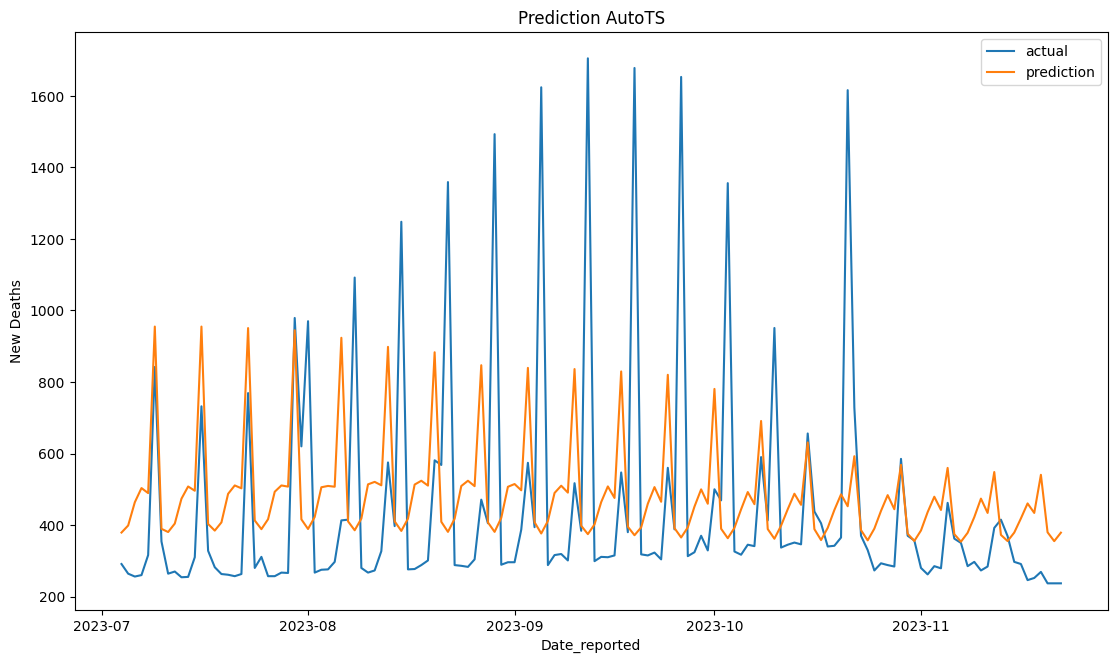

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast[target_column], label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [8]:
non_zero = []
import sys
 
for i in prediction.forecast[target_column]:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column])

Evaluation Metrics:
MSE: 119640.36
RMSE: 345.89
MAE: 220.74
MAPE: 47.97
SMAPE: 41.79


In [9]:
pickle_file = "../stored_models/automl_model.pkl"
with open(pickle_file, "wb") as file:
    pickle.dump(model, file)
    print(f"Model saved in {pickle_file}")

Model saved in ../stored_models/automl_model.pkl
